# 3. Visualisation: Washington DC Daily Bike Rental Figures

Date: 2020-10-30

## About the Notebook

This is an extended visualisation exercise, where a dataset is processed and visualised using the different graphical methods outlined in **M248 Unit 1**.

In section 1, the dataset is introduced and a table is used to explain the various attributes.

In section 2, the dataset is

- Imported from SQLite database
    - Using two classes:
        - `Database`
        + `Table`
    - See `M248.query`
- Processed
    - **Filtering** on a specific variable
        - Method: `query()`
    - **Recasting** variables
        - Method: `astype()`
    - **Descriptive columns** appended for indexed variables
        - Function: `addDescCol()`


Finally in section 3, four visualisations are produced

1. Side-by-side bar plot
    - Method: `pivot_table()`
2. Frequency histogram
3. Comparative boxplots
4. Scatterplot

As the exercise is to visualise the data in Python, there is no comment on the graphics.

## 1. About the Dataset

Source: BikeRentalDaily

> Capital Bikeshare scheme which runs in the Washington DC area (e.g. similar to the London bikeshare scheme)

| Attribute        | Unit       | Description                                                  |
| ---------------- | ---------- | ------------------------------------------------------------ |
| Dteday           | Ordinal    | Date (YYYY-MM-DD)                                            |
| Season           | Ordinal    | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)            |
| yr               | Ordinal    | Year (0: 2011, 1: 2012)                                      |
| Mnth             | Ordinal    | Month (1 - 12)                                               |
| Holiday          | Boolean    | Whether day is holiday or not (0, 1)                         |
| Weekday          | Ordinal    | Day of the week (0 - 6)                                      |
| Workingday       | Boolean    | If day is neither weekend nor holiday is 1, otherwise is 0   |
| Weathersit       | Nominal    | Weather situation (1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds, 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)) |
| Temp Normalized  | Continuous | Temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) |
| Atemp Normalized | Continuous | Atemp Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) |
| Hom Normalized   | Continuous | Normalized humidity. The values are divided to 100 (max)     |
| Windspeed        | Continuous | Normalized wind speed. The values are divided to 67 (max)    |
| Casual           | Discrete   | Count of casual users                                        |
| Registered       | Discrete   | Count of registered users                                    |
| Daily count      | Discrete   | Count of total rental bikes including both casual and registered |

## 2. Importing and Processing

In [1]:
import M248.query as query
import seaborn as sns

In [2]:
def addDescCol(df: object, col: str, a_dict: dict) -> object:
    '''
    Add a description column to a DataFrame.
    A copy of the column is appended to the DataFrame.
    The values in the new column are then replaced by values in a_dict.
    '''

    # copy the column to a new column
    desc_col: str = 'desc_' + col
    df[desc_col] = df[col]

    # map the values in the descCol
    df[desc_col].replace(a_dict, inplace=True)

    return df

### Importing

We first create a connection to the database, return the table as an object, and then *send* the table to a DataFrame.

In [3]:
# create the connection to the db
db = query.Database()

In [4]:
# query the table
tbl_bike_daily = query.Table(table="BikeRentalDailyDC", db=db)

In [5]:
# return the table as a df
df_bike_daily = tbl_bike_daily.toDF()

### Filtering the DataFrame

Note the syntax when using the `query()` method.
The argument is surrounded by backticks and the condition should be a `Str`.

In [6]:
# filter rows by year == 0
df_filtered = df_bike_daily.query('yr=="0"')

### Recasting attributes

The table has been imported without the proper data types, as expected.
We will declare a dictionary of new data types, and then recast the data in the DataFrame.
The keys of the dictionary are the column names, the values the new datatypes.

In [7]:
# Recast dtypes
newTypes = {'instant': 'int',
            'dteday': 'datetime64[ns]',
            'season': 'int',
            'yr': 'int',
            'mnth': 'int',
            'holiday': 'category',
            'weekday': 'int',
            'workingday': 'category',
            'weathersit': 'category',
            'temp': 'float',
            'atemp': 'float',
            'hum': 'float',
            'windspeed': 'float',
            'casual': 'int',
            'registered': 'int',
            'dailycount': 'int'}

df_filtered = df_filtered.astype(newTypes)

### Adding descriptive columns

The data includes some index columns, so we will add a companion description column.
A utility function `addDescCol()` was written to support the mapping process.
A dictionary is used to map the values in the new column.

In [8]:
dictSeason = {2: 'Spring', 3: 'Summer', 4: 'Fall', 1: 'Winter'}
df_filtered = addDescCol(df_filtered, 'season', dictSeason)

In [9]:
dictYr = {0: '2011', 1: '2012'}
df_filtered = addDescCol(df_filtered, 'yr', dictYr)

In [10]:
dictMnth = {1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR',
            5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG',
            9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DEC'}
df_filtered = addDescCol(df_filtered, 'mnth', dictMnth)

In [11]:
dictWeekday = {0: 'SUN', 1: 'MON', 2: 'TUES', 3: 'WEDS',
               4: 'THURS', 5: 'FRI', 6: 'SAT'}
df_filtered = addDescCol(df_filtered, 'weekday', dictWeekday)

In [12]:
dictWorkingday = {'0': 'Non-working day', '1': 'Working day'}
df_filtered = addDescCol(df_filtered, 'workingday', dictWorkingday)

In [13]:
dictHoliday = {'0': 'Non-holiday', '1': 'Holiday'}
df_filtered = addDescCol(df_filtered, 'holiday', dictHoliday)

## 3. Visualising

### Average daily users by month

In [14]:
# pivot the table: Month vs workingday
temp_pivot = df_filtered.pivot_table(values='dailycount',
                                     index=['mnth', 'desc_mnth'],
                                     columns=['desc_workingday'],
                                     aggfunc='mean')

temp_pivot

,desc_workingday,Non-working day,Working day
mnth,desc_mnth,,
1,JAN,1016.363636,1350.450000
2,FEB,1623.777778,1768.473684
3,MAR,2126.000000,2045.086957
4,APR,3205.500000,3140.750000
5,MAY,4446.900000,4350.095238
6,JUN,5005.500000,4703.090909
7,JUL,4811.000000,4421.000000
8,AUG,3820.250000,4614.304348
9,SEP,4709.333333,4049.238095


[Text(0.5, 1.0, 'Average daily users by month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Average users')]

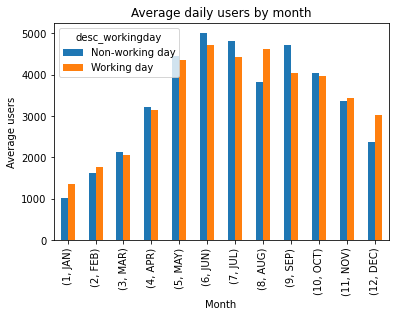

In [15]:
fig1 = temp_pivot.plot(kind='bar')
fig1.set(title='Average daily users by month',
         xlabel='Month',
         ylabel='Average users')

### Histogram of dailycount

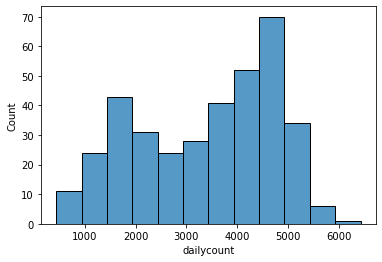

In [16]:
fig2 = sns.histplot(data=df_filtered,
                    x='dailycount',
                    binwidth=500)

### Comparison of dailycount by season

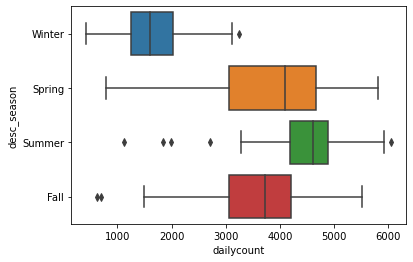

In [17]:
fig4 = sns.boxplot(data=df_filtered,
                   x='dailycount',
                   y='desc_season')

### Scatterplot of apparent temperate against casual user daily count

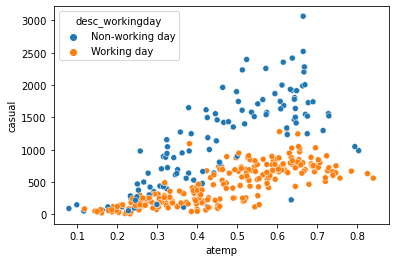

In [18]:
fig6 = sns.scatterplot(data=df_filtered,
                       x='atemp',
                       y='casual',
                       hue='desc_workingday')